## 아파트 실거래가 로딩
- 시군구를 구, 동으로 분리
- 전용면적 -> 평 -> 평형
- 계약년월 -> 계약년, 계약월 분리
- 계약년월+계약일 -> datetime변환 -> 계약요일 추출
- 컬럼삭제(본번, 부번)
- 결측치 처리
- EDA실시(통계, 시각화)
- 실거래가 회귀분석

In [8]:
import pandas as pd

apt_price = pd.read_csv('./apart_price.csv', skiprows=15, encoding='cp949',thousands=',')
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구


In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")

### 구, 동으로 분리

In [11]:
apt_price['구'] = apt_price['시군구'].str.split().str[1]
apt_price['동'] = apt_price['시군구'].str.split().str[2]
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16943,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동
16944,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동
16945,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동


### 전용면적 -> 평 -> 평형 변환

In [12]:
# 전용면적을 평으로 변환
apt_price['평'] = apt_price['전용면적(㎡)'] / 3.03

apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동,26.392739
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739


In [13]:
# 평정보를 이용하여 10평이하, 10평대, 20평대, 30평대, 40평대, 50평대 이상의 평형정보 생성

apt_price['평형'] = pd.cut(
    apt_price['평'],
    bins = [0, 10, 20, 30, 40, 50, 1000],
    labels = '10평이하, 10평대, 20평대, 30평대, 40평대, 50평대 이상'.split(', ')
)
apt_price['평형']

0        20평대
1        20평대
2        20평대
3        20평대
4        20평대
         ... 
16942    10평대
16943    20평대
16944    20평대
16945    20평대
16946    20평대
Name: 평형, Length: 16947, dtype: category
Categories (6, object): ['10평이하' < '10평대' < '20평대' < '30평대' < '40평대' < '50평대 이상']

### 계약년, 월 분리

In [14]:
# 계약 년, 월 분리

apt_price['계약년'] = apt_price['계약년월'] // 100
apt_price['계약월'] = apt_price['계약년월'] % 100

apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평,평형,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,26.392739,20평대,2021,9
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2021,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,5


### 요일추출

In [15]:
# 요일 추출

pd.to_datetime(
    apt_price['계약년월'].astype(str) + apt_price['계약일'].astype(str),
    format = '%Y%m%d'
)

apt_price['계약요일'] = pd.to_datetime(
    apt_price['계약년월'].astype(str) + apt_price['계약일'].astype(str),
    format = '%Y%m%d'
).dt.dayofweek

apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,해제사유발생일,거래유형,중개사소재지,구,동,평,평형,계약년,계약월,계약요일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,NaN,-,-,강남구,개포동,26.392739,20평대,2021,9,3
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2021,12,5
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,3
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,5,4


### 본번, 부번 컬럼 삭제

In [16]:
apt_price.drop(columns=['본번','부번'], axis=1, inplace=True)
apt_price

,시군구,번지,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평,평형,계약년,계약월,계약요일
0,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-,강남구,개포동,26.392739,20평대,2021,9,3
1,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2021,12,5
2,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,1
3,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,3
4,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,서울특별시 중랑구 중화동,450,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,19.722772,10평대,2022,7,2
16943,서울특별시 중랑구 중화동,450,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,27.732673,20평대,2022,7,2
16944,서울특별시 중랑구 중화동,274-51,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,27.950495,20평대,2021,11,3
16945,서울특별시 중랑구 중화동,274-51,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동,27.950495,20평대,2022,4,5


### 결측치 처리

In [19]:
apt_price.isnull().sum()

시군구             0
번지              4
단지명             0
전용면적(㎡)         0
계약년월            0
계약일             0
거래금액(만원)        0
층               0
건축년도            2
도로명             0
해제사유발생일     16282
거래유형            0
중개사소재지          0
구               0
동               0
평               0
평형              0
계약년             0
계약월             0
계약요일            0
dtype: int64

### EDA실시(통계, 시각화)

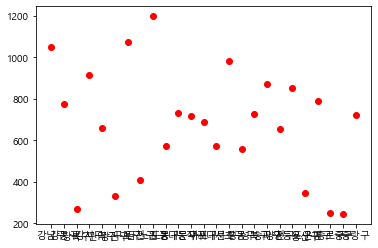

In [21]:
구별계약건수 = apt_price.groupby("구")[["층"]].count()

plt.plot(
    구별계약건수.index,
    구별계약건수['층'],
    'ro'
)

Text(0, 0.5, '계약건수')

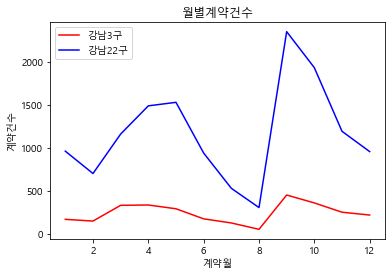

In [22]:
cond = apt_price['구'].isin(['강남구','서초구','송파구'])

월별계약건수_3구 = apt_price[cond].groupby("계약월")[["층"]].count()
월별계약건수_22구 = apt_price[~cond].groupby("계약월")[["층"]].count()

plt.plot(
    월별계약건수_3구.index,
    월별계약건수_3구['층'],
    'r-',
    label = '강남3구'
)

plt.plot(
    월별계약건수_22구.index,
    월별계약건수_22구['층'],
    'b-',
    label = '강남22구'
)

plt.legend()    # 색깔을 설명하는 범례표시
plt.title('월별계약건수')
plt.xlabel('계약월')
plt.ylabel('계약건수')

In [24]:
# 거래금액 단위를 억원으로 변환

apt_price['거래금액_억원'] = apt_price['거래금액(만원)'] / 10000
apt_price.head()

,시군구,번지,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,...,거래유형,중개사소재지,구,동,평,평형,계약년,계약월,계약요일,거래금액_억원
0,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,...,-,-,강남구,개포동,26.392739,20평대,2021,9,3,22.0
1,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2021,12,5,21.5
2,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,1,22.0
3,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,4,3,22.0
4,서울특별시 강남구 개포동,658-1,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,...,중개거래,서울 강남구,강남구,개포동,26.392739,20평대,2022,5,4,21.6


In [25]:
apt_price.groupby('구')['거래금액_억원'].mean()

구
강남구     22.159826
강동구      9.050640
강북구      6.598721
강서구      7.097661
관악구      6.792207
광진구     11.956965
구로구      5.741385
금천구      5.850555
노원구      7.098028
도봉구      6.008877
동대문구     7.604837
동작구      9.610881
마포구     11.618513
서대문구     9.003997
서초구     21.681449
성동구     15.076022
성북구      8.681004
송파구     15.515549
양천구     10.060178
영등포구     9.166000
용산구     23.377161
은평구      7.009776
종로구      7.448088
중구       8.433707
중랑구      5.648917
Name: 거래금액_억원, dtype: float64

In [47]:
apt_price.groupby(['계약년월','구'])[['시군구']].count()

시군구
계약년월   구       
202109 강남구  147
       강동구  125
       강북구   48
       강서구  153
       관악구  109
...         ...
202208 용산구    3
       은평구   19
       종로구    6
       중구     7
       중랑구    8

[300 rows x 1 columns]

In [48]:
apt_price.corr()

,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,해제사유발생일,평,계약년,계약월,계약요일,거래금액_억원
전용면적(㎡),1.000000,-0.058449,0.007961,0.718308,0.099237,-0.221913,0.023816,1.000000,-0.057840,0.042416,0.002910,0.718308
계약년월,-0.058449,1.000000,0.067394,-0.038837,-0.003597,0.043972,0.642854,-0.058449,0.999439,-0.870598,-0.046750,-0.038837
계약일,0.007961,0.067394,1.000000,0.017466,0.008730,-0.016405,0.108530,0.007961,0.069327,-0.087633,-0.018527,0.017466
거래금액(만원),0.718308,-0.038837,0.017466,1.000000,0.198597,-0.110521,0.025240,0.718308,-0.038652,0.031415,0.008974,1.000000
층,0.099237,-0.003597,0.008730,0.198597,1.000000,0.155553,0.096349,0.099237,-0.003923,0.007949,0.020499,0.198597
건축년도,-0.221913,0.043972,-0.016405,-0.110521,0.155553,1.000000,-0.009154,-0.221913,0.043554,-0.032497,-0.006340,-0.110521
해제사유발생일,0.023816,0.642854,0.108530,0.025240,0.096349,-0.009154,1.000000,0.023816,0.638321,-0.513640,-0.064840,0.025240
평,1.000000,-0.058449,0.007961,0.718308,0.099237,-0.221913,0.023816,1.000000,-0.057840,0.042416,0.002910,0.718308
계약년,-0.057840,0.999439,0.069327,-0.038652,-0.003923,0.043554,0.638321,-0.057840,1.000000,-0.886586,-0.045386,-0.038652
계약월,0.042416,-0.870598,-0.087633,0.031415,0.007949,-0.032497,-0.513640,0.042416,-0.886586,1.000000,0.021046,0.031415


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


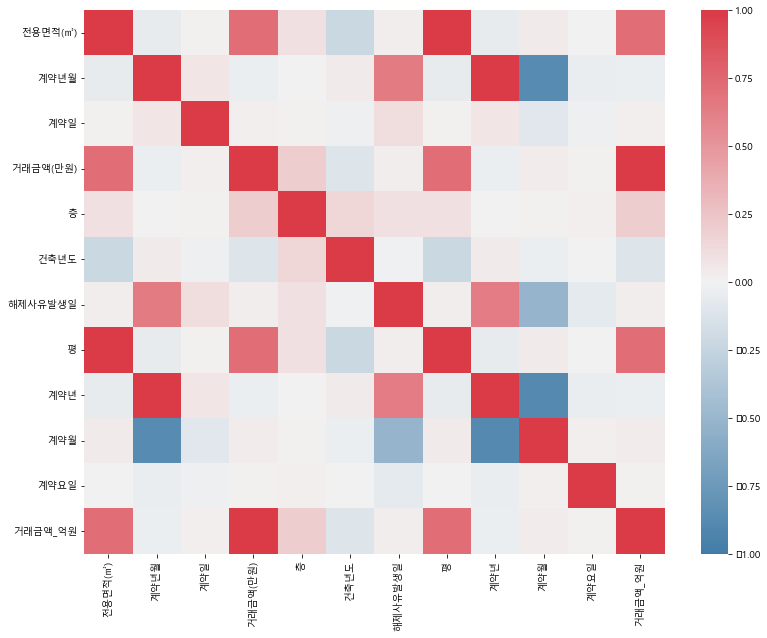

In [50]:
import seaborn as sns
plt.figure(figsize=(13, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(apt_price.corr(),cmap=cmap, vmin = -1)     # 최소값을 -1로 설정

plt.show()

### 실거래가 회귀분석

In [31]:
apt_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   시군구       16947 non-null  object  
 1   번지        16943 non-null  object  
 2   단지명       16947 non-null  object  
 3   전용면적(㎡)   16947 non-null  float64 
 4   계약년월      16947 non-null  int64   
 5   계약일       16947 non-null  int64   
 6   거래금액(만원)  16947 non-null  int64   
 7   층         16947 non-null  int64   
 8   건축년도      16945 non-null  float64 
 9   도로명       16947 non-null  object  
 10  해제사유발생일   665 non-null    float64 
 11  거래유형      16947 non-null  object  
 12  중개사소재지    16947 non-null  object  
 13  구         16947 non-null  object  
 14  동         16947 non-null  object  
 15  평         16947 non-null  float64 
 16  평형        16947 non-null  category
 17  계약년       16947 non-null  int64   
 18  계약월       16947 non-null  int64   
 19  계약요일      16947 non-null  int64   
 20  거래금액_억

In [35]:
features = ['구','동','평형']

X = apt_price[features]
X = pd.get_dummies(X)
y = apt_price['거래금액_억원']

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(
    X, y, random_state = 0
)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_tr,y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.8524617586000363, 0.8374670927027537)

In [36]:
# 학습, 평가 데이터로 MAE 확인
from sklearn.metrics import mean_absolute_error
pred1 = model.predict(x_tr)
pred2 = model.predict(x_te)
mean_absolute_error(y_tr, pred1), mean_absolute_error(y_te, pred2)

(1.9719371810463762, 2.1586680537633156)